## Pandas: import HTML table

Pandas read_html can import tables directly from any url. (Try wikipedia!)

1. Clean and store data from isotopes_of_cobalt.html

2. Store it and
    * a) plot it
    * b) calculate something fun with it

In [139]:
import pandas as pd

# importing dirty table
tab_co = pd.read_html('../Data/isotopes_of_cobalt.html')
tc = tab_co[0]
print(f'Total tables: {len(tab_co)}')
tc.head()

Total tables: 1


,0,1,2,3,4,5,6,7,8,9
0,Nuclide [n 1],Z,N,Isotopic mass (Da) [n 2][n 3],Half-life [n 4],Decay mode [n 5],Daughter isotope [n 6],Spin and parity [n 7][n 4],Natural abundance (mole fraction),Natural abundance (mole fraction)
1,Nuclide [n 1],Excitation energy[n 4],Excitation energy[n 4],Excitation energy[n 4],Half-life [n 4],Decay mode [n 5],Daughter isotope [n 6],Spin and parity [n 7][n 4],Normal proportion,Range of variation
2,47Co,27,20,47.01149(54)#,NaN,NaN,NaN,7/2−#,NaN,NaN
3,48Co,27,21,48.00176(43)#,NaN,p,47Fe,6+#,NaN,NaN
4,49Co,27,22,48.98972(28)#,<35 ns,p (>99.9%),48Fe,7/2−#,NaN,NaN


## Time machine
calculate human epochs with time module

1. calculate current time
2. create a loop to go back and forth in time

About time.strftime:
- The range really is 0 to 61; value 60 is valid in timestamps representing leap seconds and value 61 is supported for historical reasons.
- When used with the strptime() function, %U and %W are only used in calculations when the day of the week and the year are specified.

[docs.python.org/3/library/time](https://docs.python.org/3/library/time.html#time.strftime)

In [186]:
import time
import random as rng

# randomizer
a = rng.randint(90,255)
random_era = time.gmtime((10**3)+ a**5/a)
today = time.gmtime()

print(f"Today it is: {today},\n You have traveled to: {random_era}")
if random_era >= today:
    print("yo, its the future")
else:
    print("yo it's da past")


Today it is: time.struct_time(tm_year=2022, tm_mon=9, tm_mday=13, tm_hour=19, tm_min=29, tm_sec=26, tm_wday=1, tm_yday=256, tm_isdst=0),
 You have traveled to: time.struct_time(tm_year=2040, tm_mon=4, tm_mday=7, tm_hour=1, tm_min=28, tm_sec=41, tm_wday=5, tm_yday=98, tm_isdst=0)
yo, its the future


## Dictionary data type
1. create two or more dictionaries 
2. connect data
3. plot it

Density of planet['Mars']=3.93g/cm³


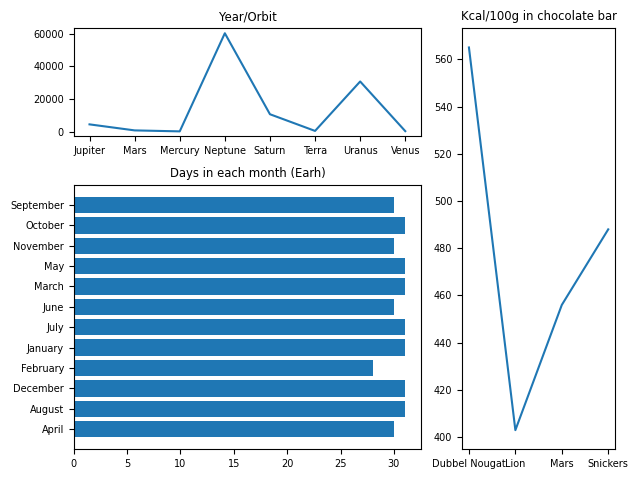

Other kinds of Mars:
god['Mythology']['Roman'][3]='Mars'
Days in month['March']=31.
Days for planet['Mars']=687 to orbit sun.
Kcal in bars['Mars']=456/100 gram.


In [65]:
import random
import re
import matplotlib.pyplot as plt

# This dictionary contanins month:name and its ammount of days.
leap_year = 0 # Dictionaries aren't immutable. February go brr.
month = {
    'January': 31,'February': 28+leap_year,'March' : 31,'April' : 30,'May' : 31,'June': 30,'July':31,
    'August': 31,'September': 30,'October': 31,'November': 30,'December':31,
}

# This dictionary contains moth:name and its propensity data. 
moth_propensity = {
    'Attacus Atlas': 100,
    'Arctia Caja': 1,
    'Blackberry Skeletonizer': 9,
    'Ypsolopha Sasayamana': 9,
}

# This one contains all planet in orbit and their density data. (g/cm³)
planet = {
'Mercury':5.43,
'Venus':5.24,
'Terra':5.51,
'Mars':3.93,
'Jupiter':1.33,
'Saturn':6870,
'Uranus':1.27,
'Neptune':1.64,
}

print(f"Density of {planet['Mars']=}g/cm³")

# Let's change gravitational to orbital.

# Converting dictionary to string
planet_name_string = str(planet)
planet_string = re.sub(r'[^A-Za-z,'']', '', planet_name_string)
strip_planet = planet_string.strip()
 
planet_li = strip_planet.split(',') # This an ordered list with planets (8)
orbital_days_li = [88,225,365,687,4383,10592,30681,60266] # List with year.

# Brute forcing new values into dictionary
for key in planet_li:
    for val in orbital_days_li:
        planet[key] = val
        orbital_days_li.remove(val)
        break

# Planet dictionary now contain the orbital period in year for each planet.
# Let's continue. This Dictionary contains nested gods...
god = {
    'Mythology':
        {
            'Roman':['Aphrodite', 'Appollo', 'Juno', 'Mars', 'Terra', 'Hades', 'Zeus', 'Luna', 'Sol'],
            'Norse':['Tor', 'Odin', 'Balder','Freja', 'Njord', 'Frej'],
            'Hindu':['Brahma', 'Vishnu', 'Shiva', 'Shesha', 'Parvati'],
        },
    'Fictional':
        {
            'Pokémon':['Arceus', 'Mew', 'Kyogre', 'Rayquaza', 'Uxie'],
            'Zelda':['Nayru', 'Din', 'Farore', 'Hylia', 'Demise', 'Lord Jabu-Jabu'],
        }
}

# Curly braces can also be used for sets where they notate elements.
# The sytax is not the same as dictionaries.
# Sets are unordered, unchangeable and do not allow duplicate values.

# Energy in chocolate bar (kcal / 100g)
bars = {'Lion':403, 'Mars': 456, 'Snickers': 488 ,'Dubbel Nougat': 565} 


# Sorting dictionary to plot
lists1 = sorted(bars.items())
bar_nam, bar_kcal = zip(*lists1)

lists2 = sorted(month.items()) # sorted by key, return a list of tuples
mon_nam, mon_dy = zip(*lists2) # unpack a list of pairs into two tuples

lists3 = sorted(planet.items()) # sorted by key, return a list of tuples
pla_nam, pla_ye = zip(*lists3) # unpack a list of pairs into two tuples


# Matplotlib render preferences
plt.rcParams.update({'font.size': 7})

plot1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
plot2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3, colspan=2)
plot3 = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
  
# Plot1
plot2.plot(bar_nam, bar_kcal)
#plot2.set_xticklabels([])
plot2.set_title('Kcal/100g in chocolate bar')
  
# Plo2
plot1.plot(pla_nam, pla_ye)
plot1.set_title('Year/Orbit')
  
# Plot3
plot3.barh(mon_nam, mon_dy)
plot3.set_title('Days in each month (Earh)')
  
# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

print("Other kinds of Mars:\n" 
    f"{god['Mythology']['Roman'][3]=}\n"
    f"Days in {month['March']=}.\n"
    f"Days for {planet['Mars']=} to orbit sun.\n"
    f"Kcal in {bars['Mars']=}/100 gram.")

## Randomly generate more days
Prevent the gregorian conformists!
1. Create new weekdays with proceedural generation using any method

In [136]:

def cycle_me_for_days():
    day_order = 5
    r1 = random.randint(0,2)
    r2 = random.randint(0,1)
    dwp = [["day"], ["s"], ["nes"], ["rs"], ["ur"]],
    dwm = ["mon"],["tue"],["wed"],["thu"],["fri"],["sat"],["sun"] # word constructors for random days

    # hur bäst representera??
    # 00 1 MON      DAY
    # 11 2 TUE S    DAY
    # 22 3 WED NES  DAY
    # 33 4 THU RS   DAY
    # 40 5 FRI      DAY
    # 54 6 SAT UR   DAY
    # 60 7 SUN      DAY
    # It always end on 0, so we can remove that.
    
    for counter, value in enumerate(6):
        if counter <= 3:
            n = +1 
        elif counter == 3:
            n = 0
        elif counter >= 3:
            n = 4
        dwm[counter] + dwp[n] + dwm[0]

#    dwm[0] + dwp[0]
#    dwm[1] + dwp[1] + dwm[0]
#    dwm[2] + dwp[2] + dwm[0]
#    dwm[3] + dwp[3] + dwm[0]
#    dwm[4] + dwp[0] 
#    dwm[5] + dwp[4] + dwm[0]
#    dwm[6] + dwp[0]
#    

#    word = (dwp[-3] + dwp[4] + dwp[0])  # == "friurday"
#
#    word = ''.join(word)    # joins to string
#    print(word)
#    
#    for i in range(7):
#        mon2sun = 5
#        while mon2sun<=14:
#            if mon2sun =< word = (dwp[mon2sun] + dwp[0])
#            mon2sun+=1
#            word = ''.join(word)
#            print(word)
#
    

cycle_me_for_days()

#wsx = ["s", "nes", "rs", "ur"]  # word suffix + more

TypeError: 'int' object is not iterable

In [14]:
import time
import math
import matplotlib.pyplot as plt

def timer():
    # insert fun parameters before
    for i in range(4):
        time.sleep(0.1)
        print(f"{i}, {math.e**i}")

In [15]:
timer()

0, 1.0
1, 2.718281828459045
2, 7.3890560989306495
3, 20.085536923187664
4, 54.59815003314423
5, 148.41315910257657
6, 403.428793492735
7, 1096.6331584284583
8, 2980.957987041727
9, 8103.08392757538
